In [3]:
pip install praw

  Using cached praw-7.8.1-py3-none-any.whl (189 kB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
!pip install wordcloud

In [8]:
import praw
import pandas as pd

reddit = praw.Reddit(
  client_id = '5SheS-ri_Afx8S0rXsqRBw',
  client_secret = '	lAilpLC0c9BV3ZZYpj09T6PpRw5vWg',
  user_agent = 'praw'
)

# This function returns a Pandas dataframe
# containing reddit post comments, given its id
def getComments(id):
    submission = reddit.submission(id)
    pandas_list = []
    commentsList = submission.comments.list()
    # 'limit' parameter can be increased 
    # in order to expand more comments
    submission.comments.replace_more(limit=64)
    print(len(commentsList))
    i = 0
    for c in commentsList:
        if isinstance(c, praw.models.MoreComments):
            continue
        commentText = c.body
        if commentText in {'[deleted]', '[removed]'}:
            continue
        pandas_list.append([i, commentText])
        i+=1
    df = pd.DataFrame(pandas_list)
    df.columns = ['id', 'description']
    return df

In [7]:
corpus = getComments('1detli')

print(corpus.shape)
corpus.head()

902
(452, 2)


,id,description
0,0,My father passed away last year. One item he ...
1,1,My mom told me this story the other day and it...
2,2,"When I was 15, my mother and I were standing i..."
3,3,Scariest moment of my life happened while my f...
4,4,I saw a 'shadow person' once.\n\nI didn't know...


In [9]:
print('First spooky story : ',corpus.loc[0,'description'])

First spooky story :  My father passed away last year.  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather.  For years he had this shotgun stashed in the attic.  After he passed, I had gone in the attic to look for it, only to find that it wasn't there.

A few months later, I had a dream in which I was talking to him and I asked him where he had put the shotgun.  He told me it was in the closet of a spare bedroom.  I called my mother and had her check, and sure enough that's where it was.

Now it's completely possible that my father had told me that when he was alive, and the dream was little more than a memory, but I certainly don't recall that being the case.


In [10]:
import re
from bs4 import BeautifulSoup

corpus['clean_description'] = corpus['description'].apply(lambda x: BeautifulSoup(x, "html.parser").get_text())
corpus['clean_description'] = corpus['clean_description'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

print('Description cleaned of the first product:', corpus.loc[0, 'clean_description'])


Description cleaned of the first product: My father passed away last year  One item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  For years he had this shotgun stashed in the attic  After he passed I had gone in the attic to look for it only to find that it wasnt there

A few months later I had a dream in which I was talking to him and I asked him where he had put the shotgun  He told me it was in the closet of a spare bedroom  I called my mother and had her check and sure enough thats where it was

Now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but I certainly dont recall that being the case


C:\Users\user\anaconda3\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [11]:
corpus['clean_description'] = corpus['clean_description'].apply(lambda x: x.lower())
print('First story lower-cased:', corpus.loc[0, 'clean_description'])


First story lower-cased: my father passed away last year  one item he always said he wanted me to have was a shotgun which had originally belonged to his grandfather  for years he had this shotgun stashed in the attic  after he passed i had gone in the attic to look for it only to find that it wasnt there

a few months later i had a dream in which i was talking to him and i asked him where he had put the shotgun  he told me it was in the closet of a spare bedroom  i called my mother and had her check and sure enough thats where it was

now its completely possible that my father had told me that when he was alive and the dream was little more than a memory but i certainly dont recall that being the case


In [12]:
from nltk.tokenize import word_tokenize

corpus['clean_tokens'] = corpus['clean_description'].apply(lambda x: word_tokenize(x))
corpus.head()


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[my, father, passed, away, last, year, one, it..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[my, mom, told, me, this, story, the, other, d..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[when, i, was, my, mother, and, i, were, stand..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, of, my, life, happened, whi..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[i, saw, a, shadow, person, once, i, didnt, kn..."


In [13]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens):
    lemmatized_tokens = []
    for token in tokens:
        if token not in stop_words:
            pos = pos_tag([token])[0][1]
            if pos.startswith('NN'):
                lemma = lemmatizer.lemmatize(token, pos='n') 
            elif pos.startswith('VB'):
                lemma = lemmatizer.lemmatize(token, pos='v')  
            elif pos.startswith('JJ'):
                lemma = lemmatizer.lemmatize(token, pos='a')
            else:
                lemma = lemmatizer.lemmatize(token)
            lemmatized_tokens.append(lemma)
    return lemmatized_tokens

corpus['clean_tokens'] = corpus['clean_tokens'].apply(lemmatize)
corpus.head()


,id,description,clean_description,clean_tokens
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al..."
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, told, story, day, freak, fuck, old, sist..."
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol..."
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, life, happen, friend, camp,..."
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call..."


In [14]:
corpus["clean_document"] = corpus["clean_tokens"].apply(lambda tokens: ' '.join(tokens))
corpus.head()


,id,description,clean_description,clean_tokens,clean_document
0,0,My father passed away last year. One item he ...,my father passed away last year one item he a...,"[father, pass, away, last, year, one, item, al...",father pass away last year one item always say...
1,1,My mom told me this story the other day and it...,my mom told me this story the other day and it...,"[mom, told, story, day, freak, fuck, old, sist...",mom told story day freak fuck old sister littl...
2,2,"When I was 15, my mother and I were standing i...",when i was my mother and i were standing in t...,"[mother, stand, kitchen, talk, rack, wall, hol...",mother stand kitchen talk rack wall hold key f...
3,3,Scariest moment of my life happened while my f...,scariest moment of my life happened while my f...,"[scariest, moment, life, happen, friend, camp,...",scariest moment life happen friend camp easter...
4,4,I saw a 'shadow person' once.\n\nI didn't know...,i saw a shadow person once\n\ni didnt know tha...,"[saw, shadow, person, didnt, know, thats, call...",saw shadow person didnt know thats call much l...


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus["clean_document"])

# X is a generator. We can transform that as an array
X = X.toarray()
print(X.shape)

(452, 3890)


In [16]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,0.194173,-0.054046,-0.139001,0.082624,0.040680,-0.038246,-0.035991,-0.124658,0.031918,-0.056593,0.054832,0.072559,my father passed away last year one item he a...
1,0.244658,-0.031546,-0.185316,0.203890,-0.161622,0.084730,-0.091401,-0.023946,-0.163542,-0.039047,0.083554,-0.043066,my mom told me this story the other day and it...
2,0.175653,-0.014296,-0.047675,-0.098197,-0.049558,0.062272,-0.043420,-0.057443,0.017259,-0.037740,-0.070542,0.073863,when i was my mother and i were standing in t...
3,0.265224,-0.079345,0.083580,-0.050223,0.009605,-0.010005,0.021060,-0.025040,0.298275,0.188537,-0.091756,-0.156977,scariest moment of my life happened while my f...
4,0.387362,0.000195,0.090617,-0.090805,-0.019703,0.004902,-0.005014,-0.070462,0.025452,0.039320,-0.109268,0.039159,i saw a shadow person once\n\ni didnt know tha...


In [17]:
import numpy as np

def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is the one that has the maximum value for each row.
    """
    main_topic = x.idxmax() 
    return main_topic

topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:, :-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_7776\1320069565.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'topic_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,0.194173,-0.054046,-0.139001,0.082624,0.040680,-0.038246,-0.035991,-0.124658,0.031918,-0.056593,0.054832,0.072559,my father passed away last year one item he a...,topic_0
1,0.244658,-0.031546,-0.185316,0.203890,-0.161622,0.084730,-0.091401,-0.023946,-0.163542,-0.039047,0.083554,-0.043066,my mom told me this story the other day and it...,topic_0
2,0.175653,-0.014296,-0.047675,-0.098197,-0.049558,0.062272,-0.043420,-0.057443,0.017259,-0.037740,-0.070542,0.073863,when i was my mother and i were standing in t...,topic_0
3,0.265224,-0.079345,0.083580,-0.050223,0.009605,-0.010005,0.021060,-0.025040,0.298275,0.188537,-0.091756,-0.156977,scariest moment of my life happened while my f...,topic_8
4,0.387362,0.000195,0.090617,-0.090805,-0.019703,0.004902,-0.005014,-0.070462,0.025452,0.039320,-0.109268,0.039159,i saw a shadow person once\n\ni didnt know tha...,topic_0


In [18]:
topic_encoded_df['main_topic'].value_counts()


main_topic
topic_0     244
topic_1      30
topic_2      23
topic_10     21
topic_7      21
topic_6      19
topic_8      18
topic_4      18
topic_9      17
topic_11     16
topic_3      15
topic_5      10
Name: count, dtype: int64

In [20]:
# Create DataFrame containing the description of each topic in terms of the words in the vocabulary
topics_description = pd.DataFrame(svd_model.components_, columns = vectorizer.get_feature_names_out(), 
                                  index = ['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis = 1)

# Each word is map with a score of relevance for each topic
topics_description.head()

,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,youll,young,youre,youth,yukon,zag,zig,zimbabwe,zinc,zone
topic_0,0.000818,0.000736,0.006186,0.001969,0.002803,0.007199,0.002444,0.024243,0.001048,0.000819,...,0.005484,0.050570,0.028622,0.001684,0.002983,0.002198,0.002198,0.001252,0.002007,0.002972
topic_1,0.000985,0.000876,0.002071,0.001491,0.001496,0.034977,0.001476,0.008263,0.000640,0.000245,...,0.002968,0.025437,0.058375,0.000760,0.001813,0.002252,0.002252,0.000270,0.000012,0.001764
topic_2,0.000779,0.001160,0.005733,0.000935,0.003182,0.002523,0.019369,0.026339,0.000142,0.000264,...,0.003329,0.002104,0.007010,0.001784,0.003427,0.002517,0.002517,0.000218,0.001733,0.001465
topic_3,0.000801,0.002183,0.001236,0.000010,0.007986,0.001497,0.017273,0.003833,0.000266,0.000912,...,0.002123,0.020684,0.009720,0.001040,0.004663,0.001178,0.001178,0.000691,0.001840,0.003111
topic_4,0.001220,0.007207,0.003868,0.006153,0.014484,0.022939,0.013292,0.004567,0.000854,0.000247,...,0.002287,0.038979,0.083354,0.000255,0.003461,0.000006,0.000006,0.000600,0.000453,0.000725


In [21]:
for i, row in topics_description.iterrows():
    top_words = row.nlargest(5)  
    print(f"Topic {i}:")
    print(top_words)
    print("\n")


Topic topic_0:
like     0.186704
time     0.174019
say      0.168072
house    0.166743
look     0.146484
Name: topic_0, dtype: float64


Topic topic_1:
ghost      0.839041
nice       0.211803
thats      0.121699
mean       0.109253
asshole    0.101087
Name: topic_1, dtype: float64


Topic topic_2:
fuck     0.373907
say      0.285994
story    0.281589
mom      0.251548
thing    0.186413
Name: topic_2, dtype: float64


Topic topic_3:
fuck     0.301881
door     0.300651
story    0.286276
open     0.234755
say      0.201139
Name: topic_3, dtype: float64


Topic topic_4:
alien    0.408135
fuck     0.304477
dream    0.302197
im       0.182400
mom      0.159048
Name: topic_4, dtype: float64


Topic topic_5:
alien    0.525553
fuck     0.254539
time     0.218623
dude     0.212507
im       0.197916
Name: topic_5, dtype: float64


Topic topic_6:
shit      0.517453
story     0.226614
love      0.214381
scare     0.196305
reddit    0.172882
Name: topic_6, dtype: float64


Topic topic_7:
alien      

-------------------------

TOPIC  topic_0


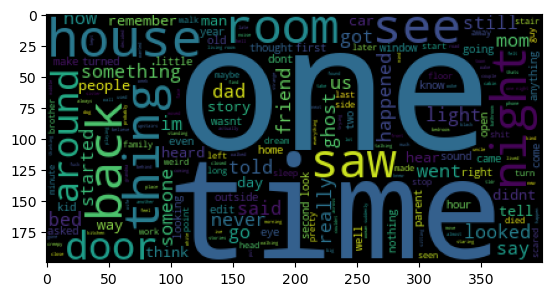


-------------------------

TOPIC  topic_1


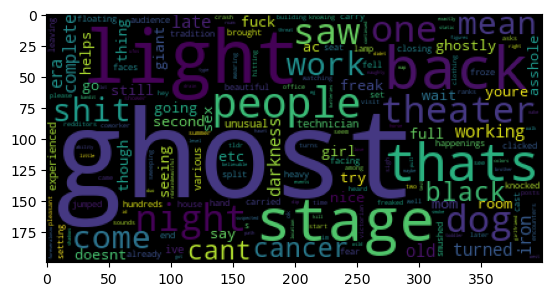


-------------------------

TOPIC  topic_2


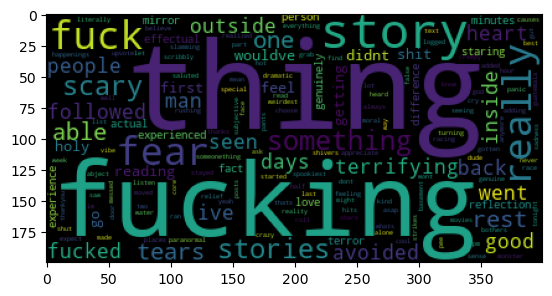


-------------------------

TOPIC  topic_3


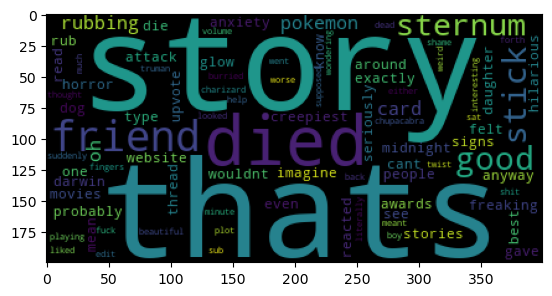


-------------------------

TOPIC  topic_4


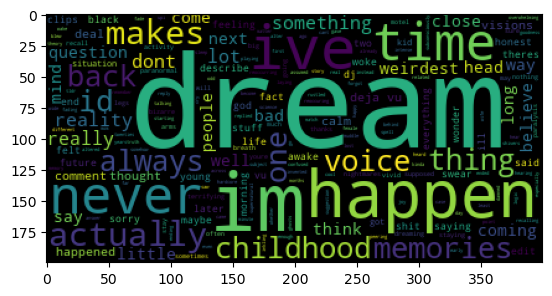


-------------------------

TOPIC  topic_5


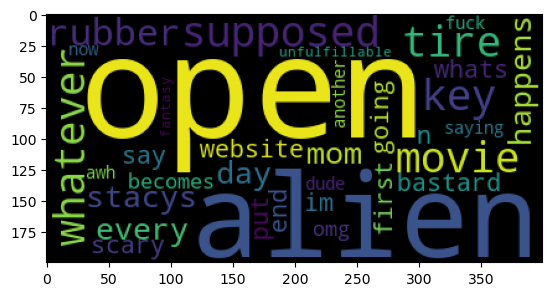


-------------------------

TOPIC  topic_6


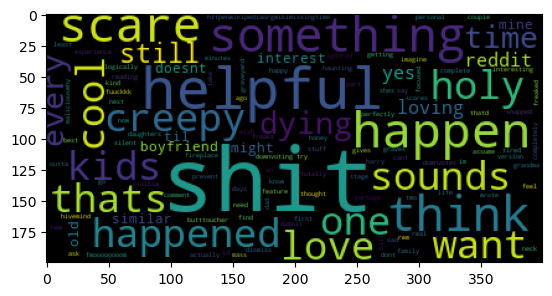


-------------------------

TOPIC  topic_7


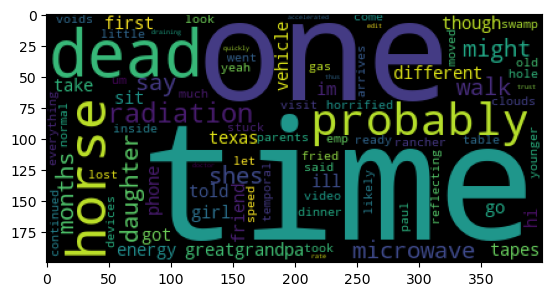


-------------------------

TOPIC  topic_8


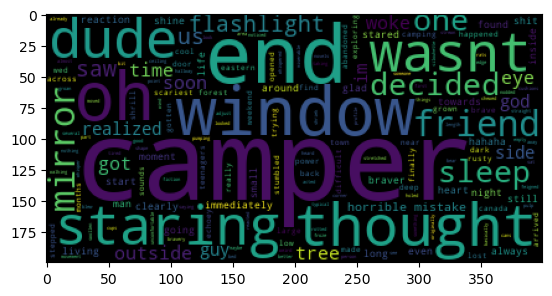


-------------------------

TOPIC  topic_9


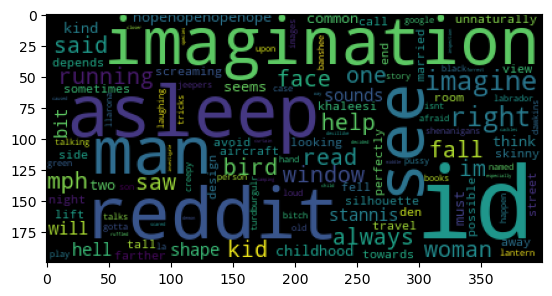


-------------------------

TOPIC  topic_10


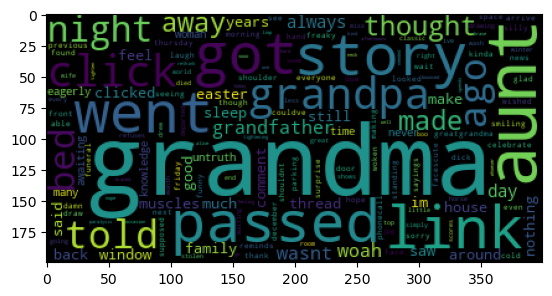


-------------------------

TOPIC  topic_11


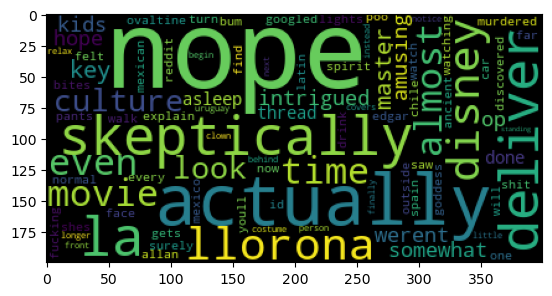

In [22]:
import wordcloud
import matplotlib.pyplot as plt

wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    if (topic_encoded_df['main_topic']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

In [29]:
import gensim

from gensim.models import Doc2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]
    return tokens

corpus['tokens'] = corpus['clean_document'].apply(preprocess_text)
tagged_data = [gensim.models.doc2vec.TaggedDocument(words=row['tokens'], tags=[str(i)]) for i, row in corpus.iterrows()]

model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=100)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)
doc_vectors = [model.infer_vector(row['tokens']) for _, row in corpus.iterrows()]

X = np.array(doc_vectors)

print(X.shape)


(452, 100)


In [30]:
from sklearn.decomposition import TruncatedSVD
# Train SVD model
svd_model = TruncatedSVD(n_components=12) # We test on 12 topics
lsa = svd_model.fit_transform(X)
topic_encoded_df = pd.DataFrame(lsa, columns = ["topic_" + str(i) for i in range(lsa.shape[1])])
topic_encoded_df["documents"] = corpus['clean_description']
topic_encoded_df.head()

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents
0,4.632154,-0.878331,-0.103954,1.384928,0.212434,-0.644112,-0.507331,0.253124,1.788895,-0.848129,-0.664691,-0.669510,my father passed away last year one item he a...
1,5.249268,-2.119420,-0.718953,1.606305,1.950131,-1.264935,-0.516682,0.463601,0.525311,-1.209700,-0.271619,1.572418,my mom told me this story the other day and it...
2,3.715893,0.338495,-0.162445,-0.788903,1.043435,0.267079,0.124378,0.096801,1.528571,-0.025695,-2.004010,1.699922,when i was my mother and i were standing in t...
3,9.310704,5.068832,-3.504008,-2.391770,-5.950074,4.752460,-1.387349,-3.023438,2.865552,-1.913588,-1.082637,-2.554160,scariest moment of my life happened while my f...
4,8.379972,3.337699,2.235489,-5.657732,-1.804157,-0.191231,-0.483123,-2.556383,-0.348472,0.175012,-6.590298,-4.612329,i saw a shadow person once\n\ni didnt know tha...


In [31]:
import numpy as np

def extract_main_topics(x):
    """
    Return the main topic for each document. The main topic is the one that has the maximum value for each row.
    """
    main_topic = x.idxmax() 
    return main_topic

topic_encoded_df.loc[:, 'main_topic'] = 0

for i, row in topic_encoded_df.iloc[:, :-2].iterrows():
    topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)

topic_encoded_df.head()


C:\Users\user\AppData\Local\Temp\ipykernel_7776\1320069565.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'topic_0' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  topic_encoded_df.loc[i, 'main_topic'] = extract_main_topics(row)


,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,documents,main_topic
0,4.632154,-0.878331,-0.103954,1.384928,0.212434,-0.644112,-0.507331,0.253124,1.788895,-0.848129,-0.664691,-0.669510,my father passed away last year one item he a...,topic_0
1,5.249268,-2.119420,-0.718953,1.606305,1.950131,-1.264935,-0.516682,0.463601,0.525311,-1.209700,-0.271619,1.572418,my mom told me this story the other day and it...,topic_0
2,3.715893,0.338495,-0.162445,-0.788903,1.043435,0.267079,0.124378,0.096801,1.528571,-0.025695,-2.004010,1.699922,when i was my mother and i were standing in t...,topic_0
3,9.310704,5.068832,-3.504008,-2.391770,-5.950074,4.752460,-1.387349,-3.023438,2.865552,-1.913588,-1.082637,-2.554160,scariest moment of my life happened while my f...,topic_0
4,8.379972,3.337699,2.235489,-5.657732,-1.804157,-0.191231,-0.483123,-2.556383,-0.348472,0.175012,-6.590298,-4.612329,i saw a shadow person once\n\ni didnt know tha...,topic_0


In [39]:
topic_encoded_df['main_topic'].value_counts()


main_topic
topic_0     440
topic_3       3
topic_5       2
topic_6       2
topic_4       1
topic_1       1
topic_10      1
topic_2       1
topic_9       1
Name: count, dtype: int64

In [35]:
topics_description = pd.DataFrame(svd_model.components_[:, :100], 
                                  columns=vectorizer.get_feature_names_out()[:100], 
                                  index=['topic_' + str(i) for i in range(svd_model.components_.shape[0])])

# Compute absolute values of coefficients
topics_description = topics_description.apply(np.abs, axis=1)

# Each word is mapped with a score of relevance for each topic
topics_description.head()


,aaaand,aaand,abandon,abduct,abduction,ability,abject,able,aboard,abominably,...,alcohol,alert,alien,alive,allan,allergic,alley,allow,alongside,alright
topic_0,0.079261,0.007584,0.005480,0.081090,0.046579,0.111607,0.086800,0.176767,0.096191,0.025340,...,0.169982,0.121982,0.011821,0.011862,0.153925,0.064965,0.002401,0.122619,0.014648,0.036040
topic_1,0.127821,0.041539,0.191239,0.000222,0.050581,0.038880,0.122489,0.033813,0.092283,0.050251,...,0.067466,0.010423,0.118564,0.171658,0.030419,0.038923,0.094251,0.135623,0.030261,0.110839
topic_2,0.081831,0.010644,0.041528,0.088060,0.024603,0.047473,0.078559,0.061052,0.011215,0.142144,...,0.079789,0.025205,0.019419,0.078934,0.077720,0.017414,0.124040,0.159477,0.272624,0.042853
topic_3,0.076105,0.176969,0.009495,0.032680,0.110068,0.342403,0.064017,0.183617,0.142080,0.007222,...,0.045458,0.063510,0.041335,0.115766,0.057986,0.094249,0.073697,0.013756,0.039890,0.020704
topic_4,0.030007,0.051763,0.038262,0.246224,0.016510,0.070642,0.124220,0.052119,0.066470,0.107508,...,0.059314,0.019054,0.083357,0.087741,0.001328,0.262215,0.027631,0.048548,0.036306,0.042036


In [36]:
for i, row in topics_description.iterrows():
    top_words = row.nlargest(5)  
    print(f"Topic {i}:")
    print(top_words)
    print("\n")


Topic topic_0:
air               0.277814
absentmindedly    0.213045
africa            0.182395
access            0.180666
activity          0.179851
Name: topic_0, dtype: float32


Topic topic_1:
aka            0.276654
access         0.268320
abruptly       0.256947
acknowledge    0.249346
add            0.197459
Name: topic_1, dtype: float32


Topic topic_2:
alongside    0.272624
album        0.260313
aint         0.212362
afraid       0.194404
actor        0.181691
Name: topic_2, dtype: float32


Topic topic_3:
ability    0.342403
agitate    0.216296
afford     0.211849
advise     0.206260
abuse      0.196204
Name: topic_3, dtype: float32


Topic topic_4:
allergic    0.262215
air         0.255022
ah          0.250413
abduct      0.246224
aimless     0.218975
Name: topic_4, dtype: float32


Topic topic_5:
age       0.300531
alley     0.258173
actor     0.209410
abject    0.201463
ah        0.182794
Name: topic_5, dtype: float32


Topic topic_6:
abominably    0.319020
address       0

-------------------------

TOPIC  topic_0


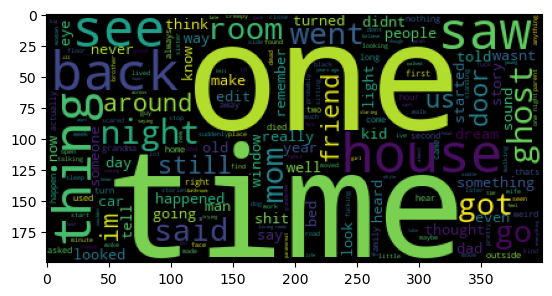


-------------------------

TOPIC  topic_1


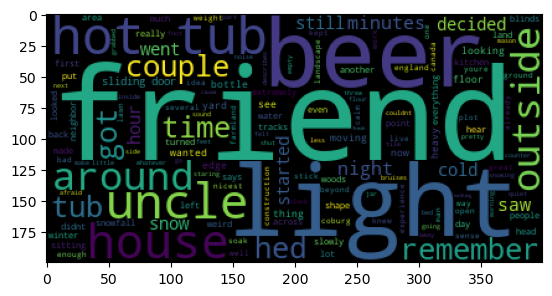


-------------------------

TOPIC  topic_2


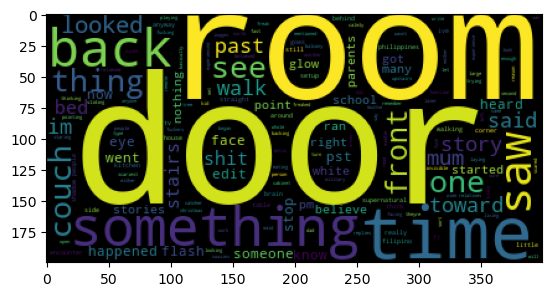


-------------------------

TOPIC  topic_3


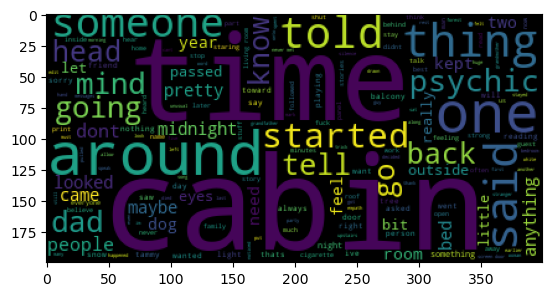


-------------------------

TOPIC  topic_4


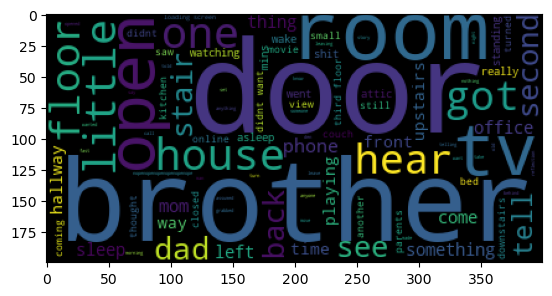


-------------------------

TOPIC  topic_5


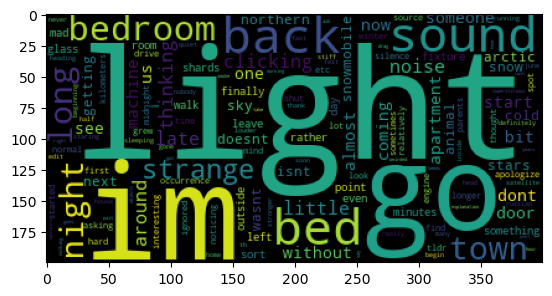


-------------------------

TOPIC  topic_6


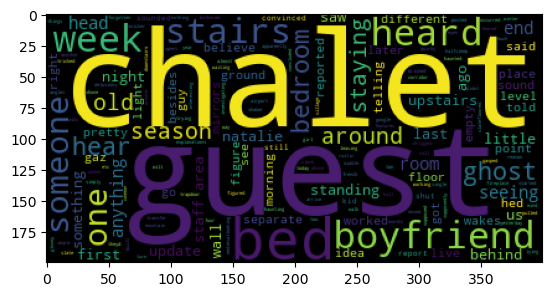


-------------------------

TOPIC  topic_7
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_8
cannot create wordcloud for this topic
-------------------------

TOPIC  topic_9


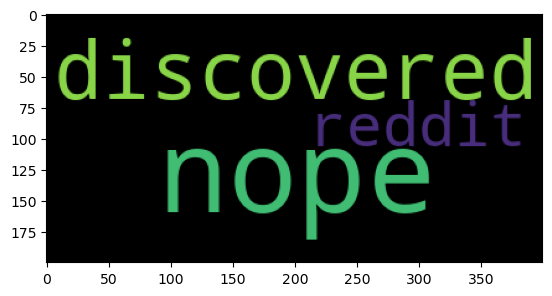


-------------------------

TOPIC  topic_10


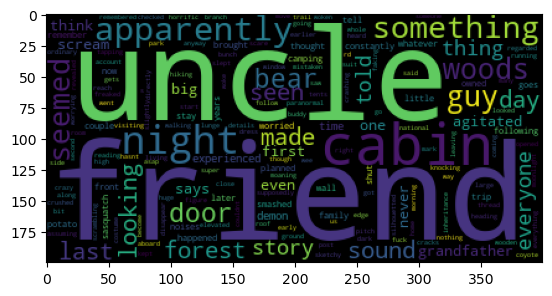


-------------------------

TOPIC  topic_11
cannot create wordcloud for this topic


In [37]:
import wordcloud
import matplotlib.pyplot as plt

wd = wordcloud.WordCloud()

cols = [c for c in topic_encoded_df.columns if 'topic_' in c]

for t in cols:
    print('-------------------------')
    print()
    print('TOPIC ', t)
    if (topic_encoded_df['main_topic']==t).any() == False :
        print('cannot create wordcloud for this topic')
        continue
    
    texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic']==t,'documents'])
    cloud = wd.generate(texts)
    plt.imshow(cloud)
    plt.show()
    
    print()

C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


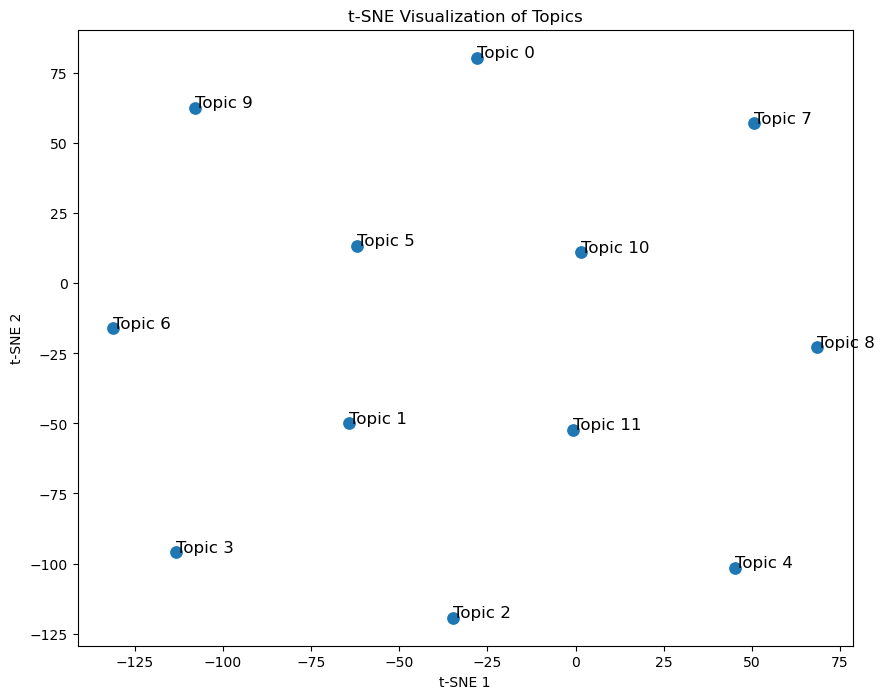

In [40]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns


topic_vectors = svd_model.components_


tsne = TSNE(n_components=2, random_state=42)
topic_2d = tsne.fit_transform(topic_vectors)
topic_2d_df = pd.DataFrame(topic_2d, columns=['TSNE-1', 'TSNE-2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE-1', y='TSNE-2', data=topic_2d_df, palette="viridis", s=100)

for i in range(len(topic_2d_df)):
    plt.text(topic_2d_df.loc[i, 'TSNE-1'], topic_2d_df.loc[i, 'TSNE-2'], f'Topic {i}', fontsize=12)

plt.title('t-SNE Visualization of Topics')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()
